In [1]:
!pip install cloudinary


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 KB 1.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Preparing metadata (setup.py) ... done
  Created wheel for cloudinary: filename=cloudinary-1.29.0-py3-none-any.whl size=137453 sha256=735dc10b1592240eef007f81d41cea0a08ad0938ac2b575991fbdd6191c5c131
  Stored in directory: /home/soutobias/.cache/pip/wheels/62/73/a6/68ea8ecf9e728801d00395d70e0dab1fcc14f5645669e26df3
Successfully built cloudinary
You should consider upgrading via the '/home/soutobias/.pyenv/versions/3.8.6/envs/oceanobs1/bin/python -m pip install --upgrade pip' command.


In [19]:
from datetime import datetime, timedelta

In [24]:
for i in range(7):
    print(datetime.strftime(datetime.now() - timedelta(days=i), format='%y%m%d00'))

22072200
22072100
22072000
22071900
22071800
22071700
22071600


In [18]:
for i in range(7)
dat
datetime.strftime(datetime(2000,10,10), format='%Y')


'2000'

In [8]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cloudinary
import cloudinary.uploader
import cloudinary.api
cloudinary.config( 
  cloud_name = "soutobias", 
  api_key = "558616956972435", 
  api_secret = "DEYDTS72cGNtkvKMiQuEP-K8ooQ",
  secure = True
)
from cloudinary.api import delete_resources_by_tag, resources_by_tag
from cloudinary.uploader import upload
from cloudinary.utils import cloudinary_url


In [3]:
url = 'https://www.marinha.mil.br/chm/sites/www.marinha.mil.br.chm/files/cartas-sinoticas/c22072100.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
left = 26
top = 222
right = 1475
bottom = 2154
img = img.crop((left, top, right, bottom))

In [4]:
img = img.convert('RGBA')
img_np = np.array(img)
df = pd.DataFrame(img_np.reshape(1932*1449, 4), columns=['red', 'green', 'blue', 'opacity'])
df.loc[((df['red']<220)&
        (df['green']<220)&
        (df['blue']<220)&
        (df['red']>0)&
        (df['green']>0)&
        (df['blue']>0)&
        (df['opacity']==255)), 'opacity'] = 0
df.loc[((df['red']==255)&(df['green']==255)&(df['blue']==255)&(df['opacity']==255)), 'opacity'] = 0
x = (df['red']==0)&(df['green']==0)&(df['blue']==0)&(df['opacity']==255)
df.loc[x, 'red'] = 255
df.loc[x, 'green'] = 255
df.loc[x, 'blue'] = 255
df.loc[x, 'opacity'] = 255

In [11]:
im = Image.fromarray(np.array(df).reshape(1932, 1449, 4))
im.save('.png')

In [26]:
DEFAULT_TAG = "python_sample_basic"
response = upload('teste.png')


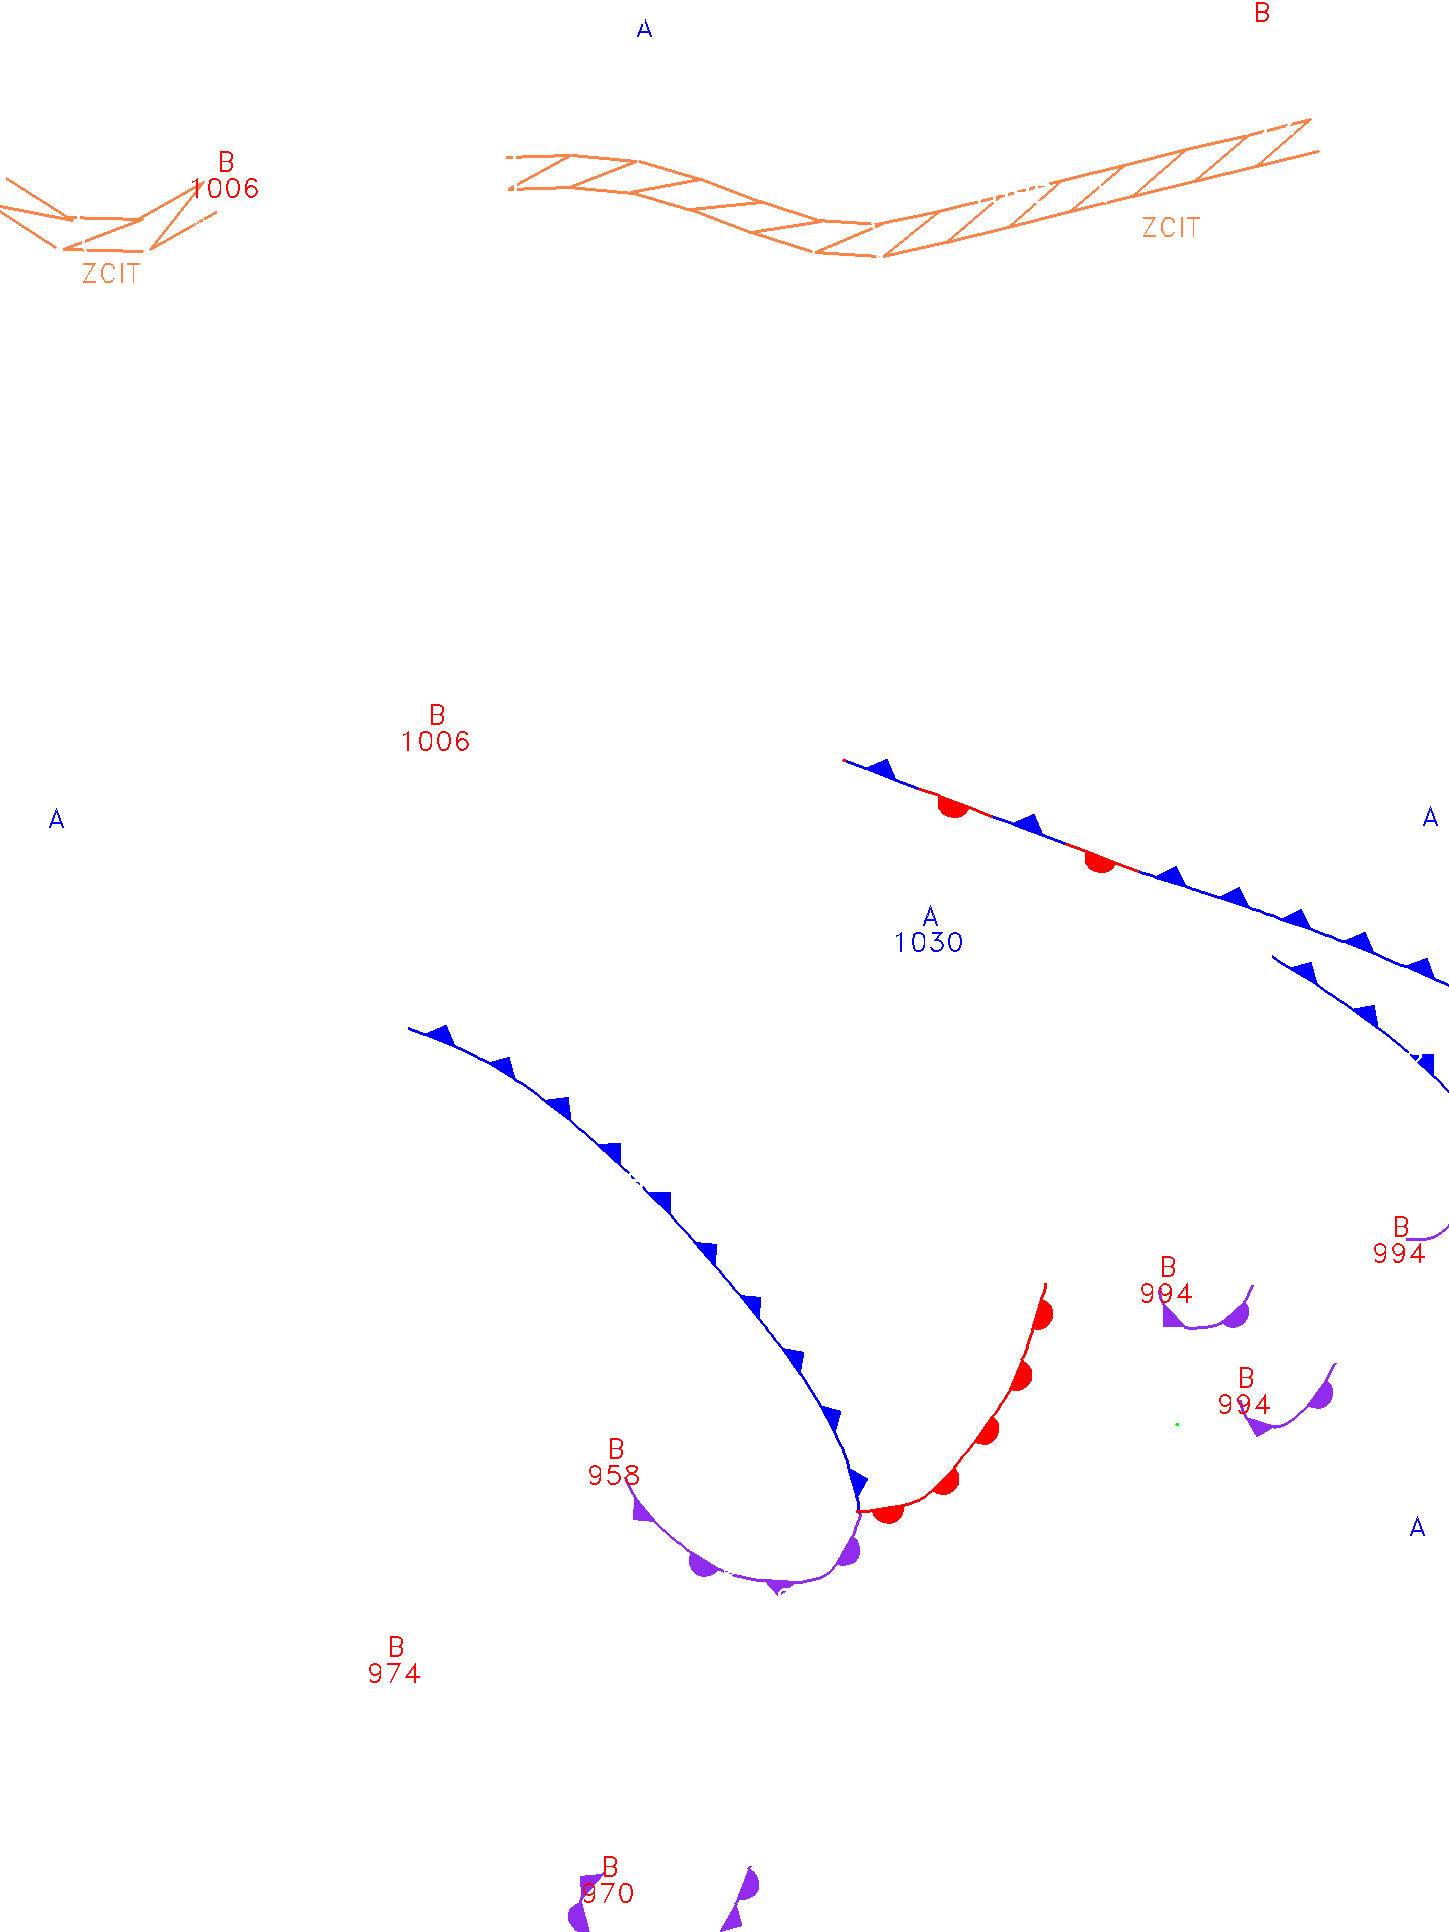

In [6]:
dump_response(response)
url, options = cloudinary_url(
    response['public_id'],
    format=response['format'],
    width=200,
    height=150,
    crop="fill"
)

In [252]:
import ogr, gdal, osr, os
def pixelOffset2coord(raster, xOffset,yOffset):
    geotransform = raster.GetGeoTransform()
    originX = geotransform[0]
    originY = geotransform[3]
    pixelWidth = geotransform[1]
    pixelHeight = geotransform[5]
    coordX = originX+pixelWidth*xOffset
    coordY = originY+pixelHeight*yOffset
    return coordX, coordY

raster = gdal.Open('teste.png')
outSHPfn='teste.shp'
geotransform = raster.GetGeoTransform()
pixelWidth = geotransform[1]
shpDriver = ogr.GetDriverByName("ESRI Shapefile")
if os.path.exists(outSHPfn):
    shpDriver.DeleteDataSource(outSHPfn)
outDataSource = shpDriver.CreateDataSource(outSHPfn)
outLayer = outDataSource.CreateLayer(outSHPfn, geom_type=ogr.wkbPoint )
featureDefn = outLayer.GetLayerDefn()
outLayer.CreateField(ogr.FieldDefn("VALUE", ogr.OFTInteger))

# array2dict
point = ogr.Geometry(ogr.wkbPoint)
row_count = array.shape[0]
for ridx, row in enumerate(array):
    for cidx, value in enumerate(row):
        Xcoord, Ycoord = pixelOffset2coord(raster,cidx,ridx)
        point.AddPoint(Xcoord, Ycoord)
        outFeature = ogr.Feature(featureDefn)
        outFeature.SetGeometry(point)
        outFeature.SetField("VALUE", int(value))
        outLayer.CreateFeature(outFeature)
        outFeature.Destroy()
outDS.Destroy()

NameError: name 'outDS' is not defined

In [253]:
point

<osgeo.ogr.Geometry; proxy of <Swig Object of type 'OGRGeometryShadow *' at 0x7f0db41b5e40> >

In [245]:
raster = gdal.Open('teste.png')
band = raster.GetRasterBand(1)
array = band.ReadAsArray()


(1932, 1449)

In [218]:
src_filename ='teste.png'
src_ds = gdal.Open(src_filename)

In [236]:
from osgeo import gdal
ds = gdal.Open('teste.tif')
width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 
maxx = gt[0] + width*gt[1] + height*gt[2]
maxy = gt[3]

In [238]:
minx

-90.0

In [214]:
format = "GTiff"
driver = gdal.GetDriverByName(format)

# Open destination dataset
dst_ds = driver.CreateCopy('test.tif', src_ds, 0)

# Specify raster location through geotransform array
# (uperleftx, scalex, skewx, uperlefty, skewy, scaley)
# Scale = size of one pixel in units of raster projection
# this example below assumes 100x100
gt = [-7916400, 100, 0, 5210940, 0, -100]

# Set location
dst_ds.SetGeoTransform(gt)

# Get raster projection
epsg = 3857
srs = osr.SpatialReference()
srs.ImportFromEPSG(epsg)
dest_wkt = srs.ExportToWkt()

# Set projection
dst_ds.SetProjection(dest_wkt)

# Close files
dst_ds = None
src_ds = None

In [203]:
import rasterio
from osgeo import gdal, osr


In [202]:
dataset = rasterio.open('teste.png', 'r')
bands = [1, 2, 3]
data = dataset.read(bands)
transform = rasterio.transform.from_bounds(-90, -70, 0, 20, data.shape[1], data.shape[2])
rasterio.

Affine(0.046583850931677016, 0.0, -90.0,
       0.0, -0.062111801242236024, 20.0)

In [196]:
dataset = rasterio.open('teste.png', 'r')
bands = [1, 2, 3]
data = dataset.read(bands)
transform = rasterio.transform.from_bounds(-90, -70, 0, 20, data.shape[1], data.shape[2])
crs = {'init': 'epsg:4326'}

with rasterio.open('teste.tif', 'w', driver='GTiff',
                   width=data.shape[1], height=data.shape[2],
                   count=3, dtype=data.dtype, nodata=0,
                   transform=transform, crs=crs) as ds
    dst.write(data, indexes=bands)

IndexError: band index 1024 out of range (not in (1, 2, 3, 4))

Exception ignored in: 'rasterio._filepath.filepath_read'
Traceback (most recent call last):
  File "rasterio/_io.pyx", line 492, in rasterio._io.DatasetReaderBase.read
IndexError: band index 1024 out of range (not in (1, 2, 3, 4))


AttributeError: 'DatasetReader' object has no attribute 'seek'

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "rasterio/_filepath.pyx", line 141, in rasterio._filepath.filepath_seek
AttributeError: 'DatasetReader' object has no attribute 'seek'


RasterioIOError: '/vsipythonfilelike/b5c354c8-afc2-4e10-b916-4b45924af6b7/b5c354c8-afc2-4e10-b916-4b45924af6b7' not recognized as a supported file format.

In [178]:
import rasterio as rio
from rasterio.transform import from_gcps
from rasterio.control import GroundControlPoint


tl = GroundControlPoint(0, 0, -83.70113410256013, 42.307951446432604)
bl = GroundControlPoint(1024, 0, -83.69940501521428, 42.307603183805234)
br = GroundControlPoint(1024, 1280, -83.698829074736, 42.3091785425499)
tr = GroundControlPoint(0, 1280, -83.70055820297041, 42.309526812647555)
gcps = [tl, bl, br, tr]

transform = from_gcps(gcps)
crs = 'epsg:4326'

with rio.open('teste.', 'r+') as ds:
    ds.crs = crs
    ds.transform = transform


In [188]:
import geopandas as gpd
import rasterio
from shapely.geometry import shape

# read the data and create the shapes 
with rasterio.open('teste.tif') as f:
    
    data = data.astype('int16')
    shapes = rasterio.features.shapes(data)

# read the shapes as separate lists
deforestation = []
geometry = []
for shapedict, value in shapes:
    deforestation.append(value)
    geometry.append(shape(shapedict))

# build the gdf object over the two lists
gdf = gpd.GeoDataFrame(
    {'deforestation': deforestation, 'geometry': geometry },
    crs="EPSG:4326"
)

In [193]:
deforestation

[0.0,
 0.0,
 0.0,
 255.0,
 139.0,
 0.0,
 139.0,
 139.0,
 255.0,
 139.0,
 139.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 139.0,
 0.0,
 0.0,
 255.0,
 0.0,
 255.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 255.0,
 139.0,
 255.0,
 255.0,
 255.0,
 139.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 139.0,
 255.0,
 139.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 255.0,
 255.0,
 255.0,
 255.0,
 255.0,
 255.0,
 255.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 255.0,
 0.0,
 0.0,
 255.0,
 0.0,
 255.0,
 0.0,
 0.0,
 0.0,
 255.0,
 139.0,
 255.0,
 255.0,
 255.0,
 255.0,
 255.0,
 255.0,
 255.0,
 255.0,
 255.0,
 0.0,
 139.0,
 139.0,
 255.0,
 255.0,
 0.0,
 0.0,
 139.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 139.0,
 255.0,
 0.0,
 255.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 139.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

TypeError: Image data of dtype object cannot be converted to float

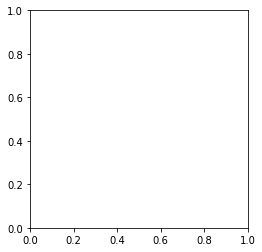

In [180]:
from rasterio.plot import show
src = dst

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap='pink')

In [159]:

src_filename ='/path/to/source.tif'
dst_filename = '/path/to/destination.tif'

# Opens source dataset
src_ds = gdal.Open(src_filename)
format = "GTiff"
driver = gdal.GetDriverByName(format)

# Open destination dataset
dst_ds = driver.CreateCopy(dst_filename, src_ds, 0)

# Specify raster location through geotransform array
# (uperleftx, scalex, skewx, uperlefty, skewy, scaley)
# Scale = size of one pixel in units of raster projection
# this example below assumes 100x100
gt = [-7916400, 100, 0, 5210940, 0, -100]

# Set location
dst_ds.SetGeoTransform(gt)

# Get raster projection
epsg = 3857
srs = osr.SpatialReference()
srs.ImportFromEPSG(epsg)
dest_wkt = srs.ExportToWkt()

# Set projection
dst_ds.SetProjection(dest_wkt)

# Close files
dst_ds = None
src_ds = None


<open DatasetReader name='teste.png' mode='r'>

In [136]:
    (df['red']==0)&(df['green']==0)&(df['blue']==0)&(df['opacity']==255)

0          False
1          False
2          False
3          False
4          False
           ...  
2799463    False
2799464    False
2799465    False
2799466    False
2799467    False
Length: 2799468, dtype: bool

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

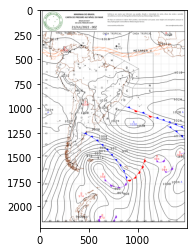

In [28]:
plt.imshow(img)
plt.show()

In [2]:
tiff_name = 'carta_sinotica-C22061612.tif'

In [3]:
import rasterio
data = rasterio.open(tiff_name).meta
data

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 579,
 'height': 768,
 'count': 4,
 'crs': CRS.from_epsg(3395),
 'transform': Affine(17303.54779170052, 0.0, -10018754.1713946,
        0.0, -17300.699583354788, 2258423.64909638)}

In [4]:
c = str(data['crs'])
c_s = c.split(':')
c_s[1]

'3395'

In [5]:
from rasterio.features import shapes
mask = None
with rasterio.open(tiff_name) as src:
    image = src.read(1) # first band
    results = (
    {'properties': {'NDVI': v}, 'geometry': s}
    for i, (s, v) 
    in enumerate(
        shapes(image, mask=mask, transform=data['transform'])))

In [6]:
 geoms = list(results)


In [7]:
import geopandas as gp
gpd_polygonized_raster  = gp.GeoDataFrame.from_features(geoms, crs=c)

In [8]:
gpd_polygonized_raster = gpd_polygonized_raster[gpd_polygonized_raster['NDVI']>0]


In [9]:
gpd_polygonized_raster

,geometry,NDVI
69,"POLYGON ((-761356.103 1445290.769, -761356.103...",255.0
78,"POLYGON ((-2509014.430 1410689.370, -2509014.4...",255.0
96,"POLYGON ((-3166549.246 1410689.370, -3166549.2...",255.0
142,"POLYGON ((-6765687.187 1203080.975, -6765687.1...",255.0
144,"POLYGON ((-6367705.587 1203080.975, -6367705.5...",255.0
...,...,...
3311,"POLYGON ((-4464315.330 -10872807.335, -4464315...",255.0
3316,"POLYGON ((-2197550.570 -10872807.335, -2197550...",255.0
3322,"POLYGON ((-9516951.285 -10890108.034, -9516951...",255.0
3348,"POLYGON ((-6713776.543 -10907408.734, -6713776...",255.0


In [10]:
crs_sys = 'epsg:'+c_s[1]

In [11]:
gpd_polygonized_raster['geometry'] = gpd_polygonized_raster['geometry'].to_crs({'init': crs_sys})

/home/soutobias/.pyenv/versions/3.8.6/envs/oceanobs1/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [12]:
gpd_polygonized_raster.to_file('tiff1212.geojson', driver='GeoJSON') 

In [22]:
import folium

m = folium.Map(location=[-19.039108, -38.954733], zoom_start=4)
m.add_child(folium.GeoJson(data=(open("tiff1212.geojson", "r")).read()))

m